In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score

### Data Processing

In [77]:
train = pd.read_csv('train.csv')
test = pd.read_csv("test.csv")

In [78]:
from sklearn import preprocessing

X, Y = train.iloc[:, :-1], train.iloc[:, -1]


In [75]:
df = X
replace_dic = {' ?':'Unknown'}
df.select_dtypes(include=['object']).replace(replace_dic)

,class_worker,education,hs_college,marital_stat,major_ind_code,major_occ_code,race,hisp_origin,sex,union_member,...,mig_chg_reg,mig_move_reg,mig_same,mig_prev_sunbelt,fam_under_18,country_father,country_mother,country_self,citizenship,vet_question
0,Not in universe,High school graduate,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,...,Unknown,Unknown,Not in universe under 1 year old,Unknown,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
1,Private,Bachelors degree(BA AB BS),Not in universe,Never married,Utilities and sanitary services,Adm support including clerical,White,All other,Male,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
2,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Manufacturing-nondurable goods,Adm support including clerical,White,All other,Female,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
3,Self-employed-not incorporated,Bachelors degree(BA AB BS),Not in universe,Divorced,Other professional services,Professional specialty,White,All other,Female,Not in universe,...,Unknown,Unknown,Not in universe under 1 year old,Unknown,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
4,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Female,Not in universe,...,Same county,Same county,No,No,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59763,Private,Some college but no degree,Not in universe,Never married,Manufacturing-nondurable goods,Machine operators assmblrs & inspctrs,White,All other,Male,Not in universe,...,Unknown,Unknown,Not in universe under 1 year old,Unknown,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
59764,Not in universe,Children,Not in universe,Never married,Not in universe or children,Not in universe,White,All other,Male,Not in universe,...,Unknown,Unknown,Not in universe under 1 year old,Unknown,Both parents present,United-States,United-States,United-States,Native- Born in the United States,Not in universe
59765,Private,Some college but no degree,Not in universe,Married-civilian spouse present,Retail trade,Sales,White,All other,Male,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Not in universe,United-States,United-States,United-States,Native- Born in the United States,Not in universe
59766,Private,5th or 6th grade,Not in universe,Married-civilian spouse present,Retail trade,Other service,White,Mexican (Mexicano),Male,Not in universe,...,Nonmover,Nonmover,Yes,Not in universe,Not in universe,Mexico,Mexico,Mexico,Foreign born- U S citizen by naturalization,Not in universe


In [79]:
# see if there are missing entries in the dataset features
categorical_columns = df.select_dtypes(include=['object']).columns
print('the number of categorical columns',len(categorical_columns))
print('the number of columns',len(X.columns))
X.isnull().sum().sort_values()

the number of categorical columns 28
the number of columns 42


id                  0
det_hh_fam_stat     0
det_hh_summ         0
unknown             0
mig_chg_msa         0
mig_chg_reg         0
mig_move_reg        0
mig_same            0
mig_prev_sunbelt    0
num_emp             0
fam_under_18        0
country_father      0
country_mother      0
country_self        0
citizenship         0
own_or_self         0
vet_question        0
vet_benefits        0
state_prev_res      0
region_prev_res     0
tax_filer_stat      0
stock_dividends     0
age                 0
class_worker        0
det_ind_code        0
det_occ_code        0
education           0
wage_per_hour       0
hs_college          0
marital_stat        0
weeks_worked        0
major_ind_code      0
race                0
hisp_origin         0
sex                 0
union_member        0
unemp_reason        0
full_or_part_emp    0
capital_gains       0
capital_losses      0
major_occ_code      0
year                0
dtype: int64

In [63]:
null_stat = X.isnull().sum()
null_variables_num = 0
null_categorical_v_n = 0
for i in range(len(X.columns)):
    if null_stat[i]>0:
        null_variables_num+=1
        if X.columns[i] in categorical_columns:
            null_categorical_v_n += 1
            
print('The number of variables containing null value:',null_variables_num)
print('The number of categorical variables containing null value:',null_categorical_v_n)


The number of variables containing null value: 0
The number of categorical variables containing null value: 0


#### remove variables which contain missing values

In [64]:
clean_columns = []
for i in range(len(X.columns)):
    if null_stat[i]<=0.3:
        clean_columns.append(X.columns[i])


In [65]:
clean_X = X
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
categorical_columns = clean_X.select_dtypes(include=['object']).columns
for categorical_column in categorical_columns:
    clean_X[categorical_column] = labelencoder.fit_transform(clean_X[categorical_column]) #fitting and transforming the desired categorical column.


In [66]:
clean_test_X = test
for categorical_column in categorical_columns:
    clean_test_X[categorical_column] = clean_test_X[categorical_column]
    clean_test_X[categorical_column] = labelencoder.fit_transform(clean_test_X[categorical_column]) #fitting and transforming the desired categorical column.


In [67]:
clean_test_X = clean_test_X.drop(columns=['id'])

In [68]:
clean_X['target'] = Y

In [69]:
# Corelation with target
x = clean_X.corr()
pd.DataFrame(x['target']).sort_values(by='target',ascending = False).style.background_gradient(cmap = 'Greens')

,target
target,1.000000
weeks_worked,0.464232
num_emp,0.388822
det_ind_code,0.343944
fam_under_18,0.293217
sex,0.284837
vet_benefits,0.273264
age,0.259719
capital_gains,0.228269
capital_losses,0.187944


<function matplotlib.pyplot.show(*args, **kw)>

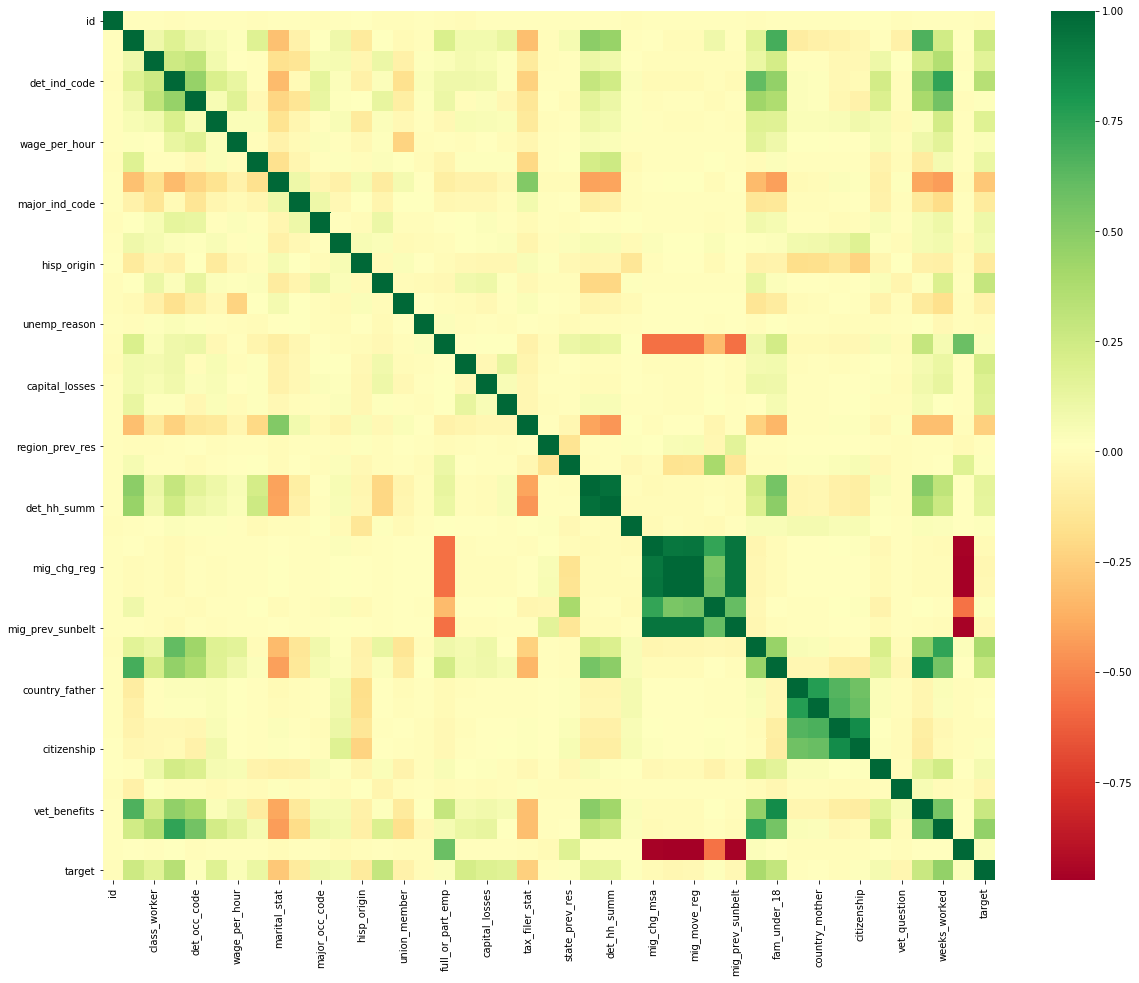

In [70]:
# Correlation tes
sns.heatmap(clean_X.corr(),annot=False,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(20,16)
plt.show

In [60]:
clean_X = clean_X.drop(columns = ['target','id'])

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(clean_X, Y, test_size=0.2, random_state=77)

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
def cross_val(model):
    pred = cross_val_score(model, X, Y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [63]:
import xgboost as xgb

In [66]:
X_train

,age,class_worker,det_ind_code,det_occ_code,education,wage_per_hour,hs_college,marital_stat,major_ind_code,major_occ_code,...,fam_under_18,country_father,country_mother,country_self,citizenship,own_or_self,vet_question,vet_benefits,weeks_worked,year
35640,74,3,0,0,5,0,2,2,14,6,...,4,40,40,40,4,0,1,2,0,94
41560,67,3,0,0,16,0,2,0,14,6,...,4,40,40,40,4,0,1,2,0,95
51851,37,7,44,12,16,0,2,0,20,10,...,4,40,40,40,4,0,1,2,40,94
22338,2,3,0,0,10,0,2,4,14,6,...,2,40,40,40,4,0,1,0,0,95
54554,25,4,40,32,16,0,2,4,6,7,...,4,40,40,40,4,0,1,2,52,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42277,29,4,37,2,8,0,2,2,2,2,...,4,40,40,40,4,1,1,2,52,94
18667,3,3,0,0,10,0,2,4,14,6,...,0,40,40,40,4,0,1,0,0,94
59348,5,3,0,0,10,0,2,4,14,6,...,2,40,40,40,4,0,1,0,0,95
8799,43,4,32,18,12,0,2,2,23,12,...,4,40,40,40,4,0,1,2,52,95


In [69]:
y_train.to_numpy()

array([0, 0, 0, ..., 0, 1, 1])

In [68]:
X_train.to_numpy()

(47814, 41)

In [92]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 3,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 4,
}

plst = list(params.items())


dtrain = xgb.DMatrix(X_train.to_numpy(), y_train.to_numpy())
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)


dtest = xgb.DMatrix(X_test.to_numpy())
ans = model.predict(dtest)



[01:35:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[01:35:02] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Accuracy: 89.79 % 
AUC score 0.8567715458276334


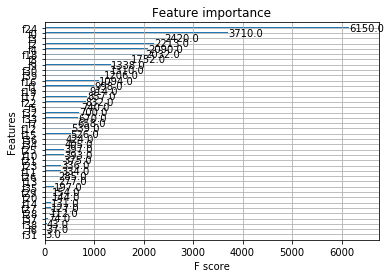

In [96]:
cnt1 = 0
cnt2 = 0
for i in range(len(y_test)):
    if ans[i] == y_test.to_numpy()[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))
print('AUC score',roc_auc_score(y_test.to_numpy(), ans))


plot_importance(model)
plt.show()

In [81]:
dtest = xgb.DMatrix(clean_test_X.to_numpy())
ans = model.predict(dtest)

In [87]:
sample = pd.read_csv('sample_submission.csv')

In [89]:
sample['income']=[int(label) for label in ans]

In [91]:
sample.to_csv('output.csv',index=False)

In [264]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [265]:
coeff_df = pd.DataFrame(lin_reg.coef_,clean_X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
MS SubClass,2697.818554
MS Zoning,-2877.469711
Lot Frontage,502.247910
Lot Area,-1585.684036
Street,877.562574
...,...
Misc Val,-1344.854363
Mo Sold,625.488734
Yr Sold,44.696856
Sale Type,-732.762455


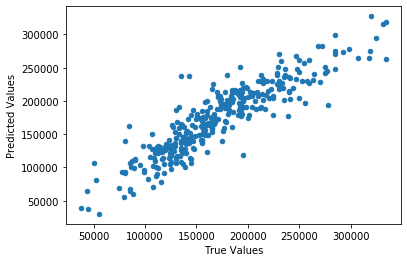

In [266]:
pred = lin_reg.predict(X_test)
pd.DataFrame({'True Values': y_test, 'Predicted Values': pred}).plot.scatter(x='True Values', y='Predicted Values')

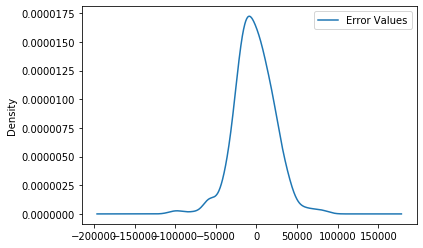

In [267]:
pd.DataFrame({'Error Values': (y_test - pred)}).plot.kde()

In [268]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 18783.62199985962
MSE: 601530304.9080608
RMSE: 24526.114753626607
R2 Square 0.8102364637203231
__________________________________
Train set evaluation:
_____________________________________
MAE: 16699.374766363457
MSE: 470588878.76457185
RMSE: 21693.060613121695
R2 Square 0.8636902327818822
__________________________________


## Ridge Linear Regression

In [269]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 18480.705117781312
MSE: 591229220.0698797
RMSE: 24315.20553213317
R2 Square 0.813486125907682
__________________________________
Train set evaluation:
_____________________________________
MAE: 16713.334605255666
MSE: 476163368.76755583
RMSE: 21821.1679056726
R2 Square 0.8620755379411088
__________________________________


## Lasso Linear Regression 

In [270]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1, 
              precompute=True, 
#               warm_start=True, 
              positive=True, 
              selection='random',
              random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 19554.09307068542
MSE: 646637606.5291348
RMSE: 25429.07010744071
R2 Square 0.7960065554383833
__________________________________
Train set evaluation:
_____________________________________
MAE: 19544.45153125923
MSE: 639079582.6836208
RMSE: 25280.023391674717
R2 Square 0.814885576178188
__________________________________


In [209]:
sample_pred = lin_reg.predict(X_sample)

In [210]:
sample = pd.read_csv("sample.csv")

In [211]:
sample['SalePrice'] = np.rint(sample_pred)

In [212]:
sample.to_csv('output.csv',index=False)

In [213]:
sample

,ID,SalePrice
0,1758,68501.0
1,1759,180870.0
2,1760,189538.0
3,1761,110132.0
4,1762,263334.0
...,...,...
1167,2925,139769.0
1168,2926,116984.0
1169,2927,239737.0
1170,2928,263681.0
